# Project Journal

**Name:** Adriana Watson

**Research Question:** The Energy Policy Act of 2005 (EPAct) included legislation intended to promote the use of solar, wind, geothermal, hydroelectric, biomass, and biofuel energy consumption. Can the changes in renewable energy consumption after the implementation of EPAct be explained by the individual contributions of solar, wind, geothermal, hydroelectric, biomass, and biofuel consumption?

**Variables:**
$$Y: Total Renewable Energy \newline
X_1: Solar Energy \newline
X_2: Wind Energy \newline
X_3: Geothermal Energy \newline
X_4: Hydroelectric Power \newline
X_5: Biomass Energy Consumption \newline
X_6: Other Biofuels \newline
X_7: After\_EPAct \newline
X_8: EPAct\_Time 

## Data Prep & EDA
**Dates:** November 1 - November 7

**Meeting Date:** November 7

### Data Cleaning Summary

**Summary of data cleaning process:**
1. Load libraries
2. Import the dataset
3. Check for and fill missing values
4. Create new variables (```After_EPAct``` and ```EPAct_Time```)
5. Remove unnecessary columns

**Issues Encountered and Resolutions:**
Only minor syntax issues and forgetting to install libraries. 


In [30]:
# Step 1: Load the Necessary Libraries
#install.packages("lubridate")
#install.packages("corrplot")
#install.packages("GGally")
#install.packages("knitr")
#install.packages("olsrr")
library(GGally)      # Matrix of plots
library(dplyr)      # For data manipulation
library(ggplot2)    # For data visualization
library(lubridate)  # For date handling
library(corrplot)   # For correlation plots
library(knitr)
library(tidyr)
library(car)
library(olsrr)

In [2]:
# Step 2: Import the Dataset
data <- read.csv("../USRenewableEnergyConsumption.csv")

In [3]:
# Step 3: Check for and Fill Missing Values
# Check for missing values
missing_values <- colSums(is.na(data))
print(missing_values)  # Print the count of missing values in each column

                              Year                              Month 
                                 0                                  0 
                            Sector                Hydroelectric.Power 
                                 0                                  0 
                 Geothermal.Energy                       Solar.Energy 
                                 0                                  0 
                       Wind.Energy                        Wood.Energy 
                                 0                                  0 
                      Waste.Energy Fuel.Ethanol..Excluding.Denaturant 
                                 0                                  0 
    Biomass.Losses.and.Co.products                     Biomass.Energy 
                                 0                                  0 
            Total.Renewable.Energy              Renewable.Diesel.Fuel 
                                 0                                  0 
      

In [4]:
data <- data %>%
  mutate(After_EPAct = ifelse((Year > 2005) | (Year == 2005 & Month >= 8), 1, 0),  # Binary variable
         EPAct_Time = ifelse(Year < 2005, 
                             -((2005 - Year) * 12 + (Month - 8)),  # Negative values before EPAct
                             (Year - 2005) * 12 + (Month - 8))  # Zero in Aug 2005, positive afterward
  )

In [5]:
# Step 5: Remove Unnecessary Columns and Select Relevant Columns
data <- data %>%
  select(Month = Month,                                    # Month
         Year = Year,                                      # Year
         Total_Renewable_Energy = Total.Renewable.Energy,  # Y
         Solar_Energy = Solar.Energy,                      # X_1
         Wind_Energy = Wind.Energy,                        # X_2
         Geothermal_Energy = Geothermal.Energy,            # X_3
         Hydroelectric_Power = Hydroelectric.Power,        # X_4
         Biomass_Energy_Consumption = Biomass.Energy,      # X_5
         Other_Biofuels = Other.Biofuels,                  # X_6
         After_EPAct,                                      # X_7
         EPAct_Time)                                       # X_8

In [6]:
head(data)

,Month,Year,Total_Renewable_Energy,Solar_Energy,Wind_Energy,Geothermal_Energy,Hydroelectric_Power,Biomass_Energy_Consumption,Other_Biofuels,After_EPAct,EPAct_Time
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1973,0.570,0,0,0.00,0.00,0.570,0,0,-377
2,1,1973,89.223,0,0,0.49,0.00,0.211,0,0,-377
3,1,1973,99.973,0,0,0.00,1.04,98.933,0,0,-377
4,1,1973,30.074,0,0,0.00,0.00,0.000,0,0,-377
5,1,1973,0.000,0,0,0.00,0.00,0.000,0,0,-377
6,2,1973,0.515,0,0,0.00,0.00,0.515,0,0,-378


### Exploratory Data Analysis Findings
**Key Visualizations:** 
* Based on the correlation matrix, significant correlations are: 
    * Total Renewable Energy & Biomass Energy Consumption
    * Solar Energy & Wind Energy
    * Wind Energy & Geothermal Energy
* The time series plot points to a steady increase in total renewable energy consumption after EPAct
* The histogram indicates that the mean energy consumption before and after EPAct was the same, but the range of values grew after EPAct

[1] "Significant Correlations (|correlation| > 0.5):"
                   Variable1              Variable2 Correlation
1        Hydroelectric_Power Total_Renewable_Energy   0.5011969
2 Biomass_Energy_Consumption Total_Renewable_Energy   0.6108683
3                Wind_Energy           Solar_Energy   0.7443091
4          Geothermal_Energy            Wind_Energy   0.5055562
5 Biomass_Energy_Consumption    Hydroelectric_Power   0.7199216


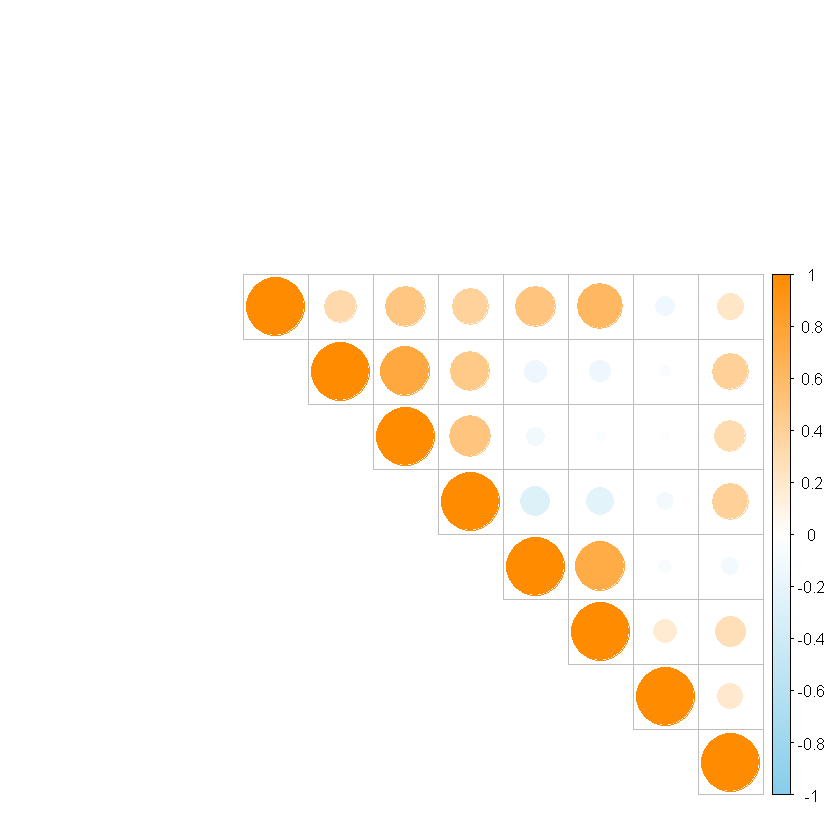

In [7]:
# Select only numeric variables, excluding 'After_EPAct' since it's binary
numeric_data <- data %>%
  select(Total_Renewable_Energy, Solar_Energy, Wind_Energy, Geothermal_Energy,
         Hydroelectric_Power, Biomass_Energy_Consumption, Other_Biofuels, EPAct_Time)

# Calculate the correlation matrix with complete observations only
correlation_matrix <- cor(numeric_data, use = "complete.obs")

# Extract significant correlations (absolute value > 0.5)
significant_correlations <- correlation_matrix[abs(correlation_matrix) > 0.5 & lower.tri(correlation_matrix, diag = FALSE)]
significant_pairs <- which(abs(correlation_matrix) > 0.5 & lower.tri(correlation_matrix, diag = FALSE), arr.ind = TRUE)
significant_correlations <- data.frame(
  Variable1 = rownames(correlation_matrix)[significant_pairs[,1]],
  Variable2 = colnames(correlation_matrix)[significant_pairs[,2]],
  Correlation = significant_correlations
)

# Print the significant correlations
print("Significant Correlations (|correlation| > 0.5):")
print(significant_correlations)

# Plot the entire correlation matrix
corrplot(
  correlation_matrix,
  method = "circle",
  type = "upper",
  col = colorRampPalette(c("skyblue", "white", "darkorange"))(200),
  tl.cex = 0.8,           # Text label size
  tl.col = "white",       # Label color
  cl.cex = 0.8            # Color legend size
)

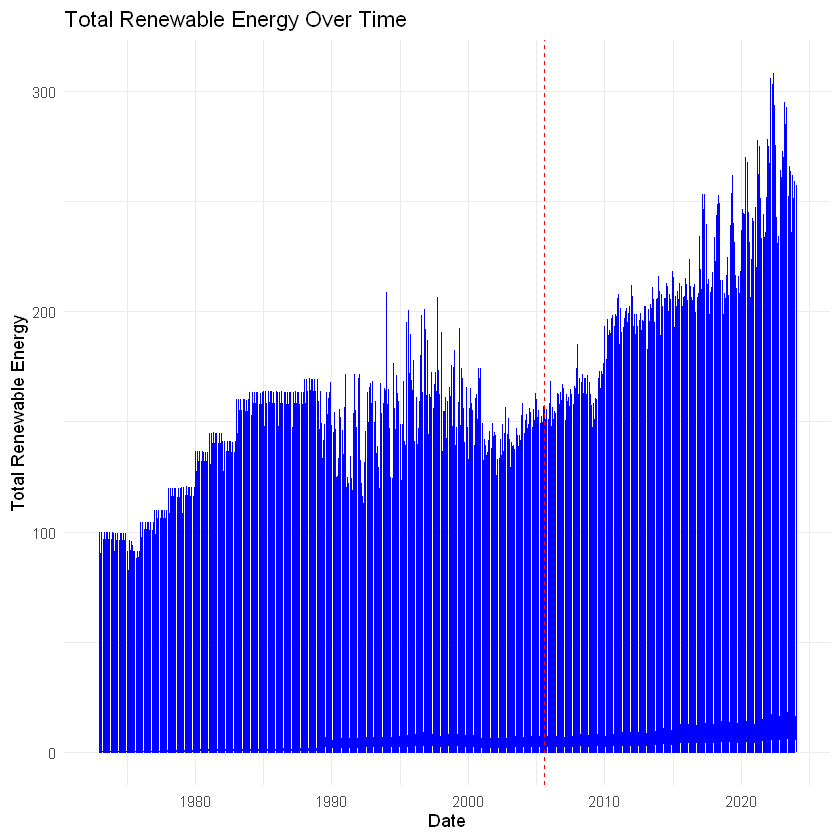

In [8]:
## Time Series Plot of Total Renewable Energy
# Create a 'Date' column for easier plotting
data <- data %>%
  mutate(Date = make_date(Year, Month))
ggplot(data, aes(x = Date, y = Total_Renewable_Energy)) +
  geom_line(color = "blue") +
  geom_vline(xintercept = as.Date("2005-08-01"), linetype = "dashed", color = "red") +
  labs(title = "Total Renewable Energy Over Time", y = "Total Renewable Energy", x = "Date") +
  theme_minimal()

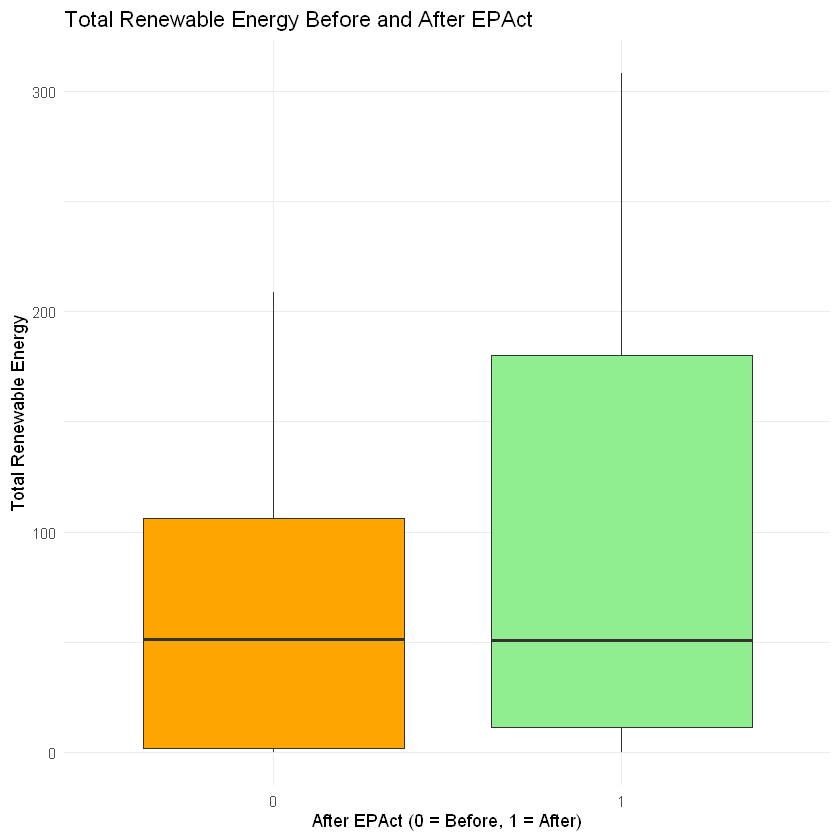

In [9]:
## Box Plot of Total Renewable Energy Before and After EPAct
ggplot(data, aes(x = as.factor(After_EPAct), y = Total_Renewable_Energy)) +
  geom_boxplot(fill = c("orange", "lightgreen")) +
  labs(title = "Total Renewable Energy Before and After EPAct", x = "After EPAct (0 = Before, 1 = After)", y = "Total Renewable Energy") +
  theme_minimal()

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information."
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


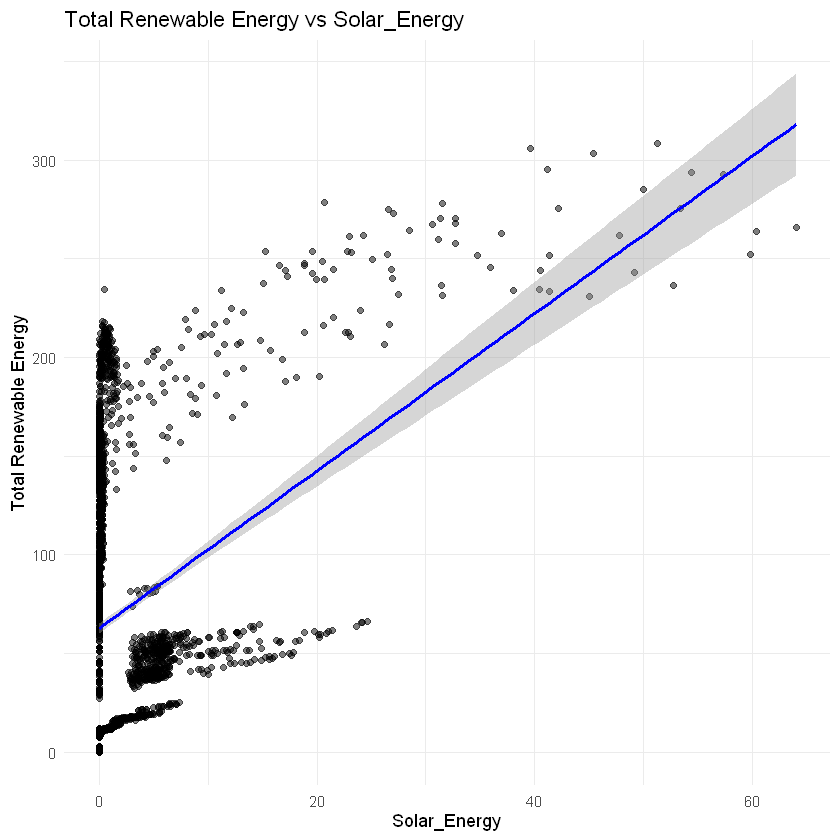

`geom_smooth()` using formula = 'y ~ x'


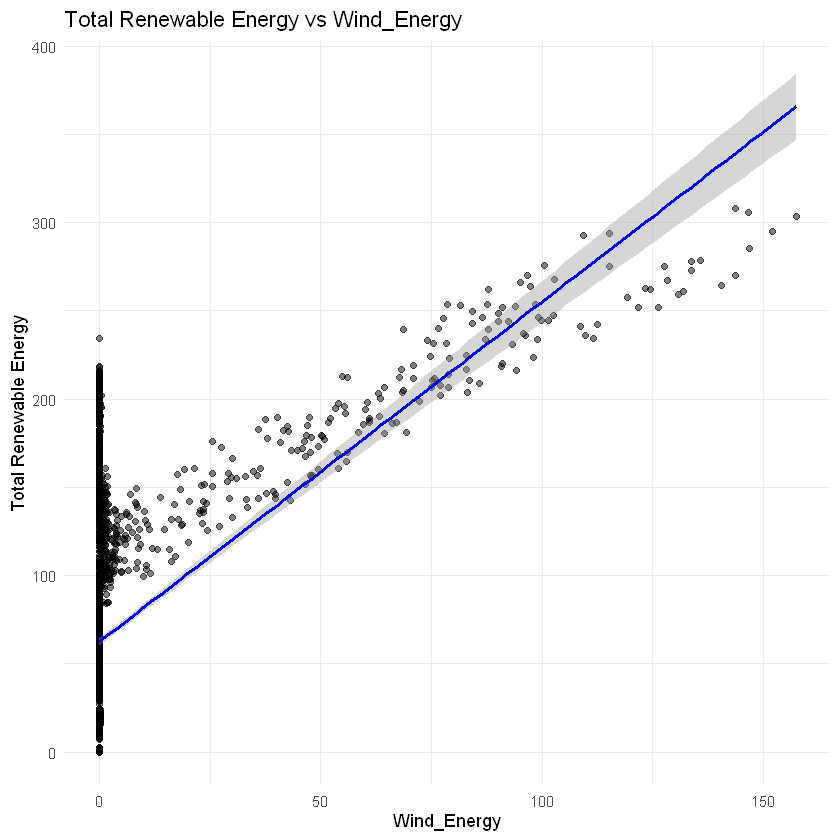

`geom_smooth()` using formula = 'y ~ x'


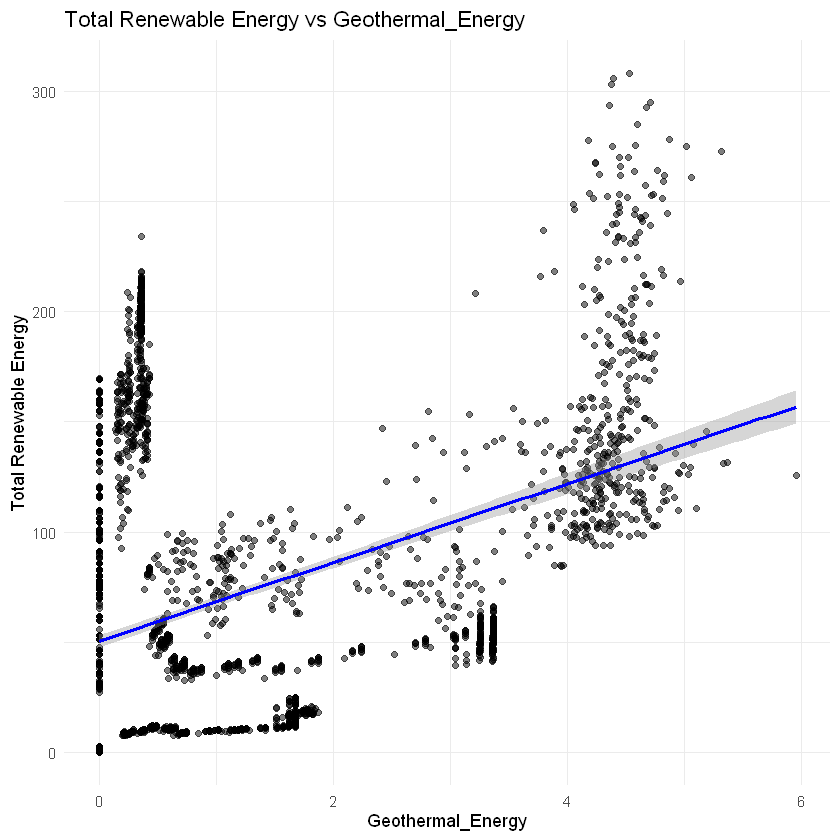

`geom_smooth()` using formula = 'y ~ x'


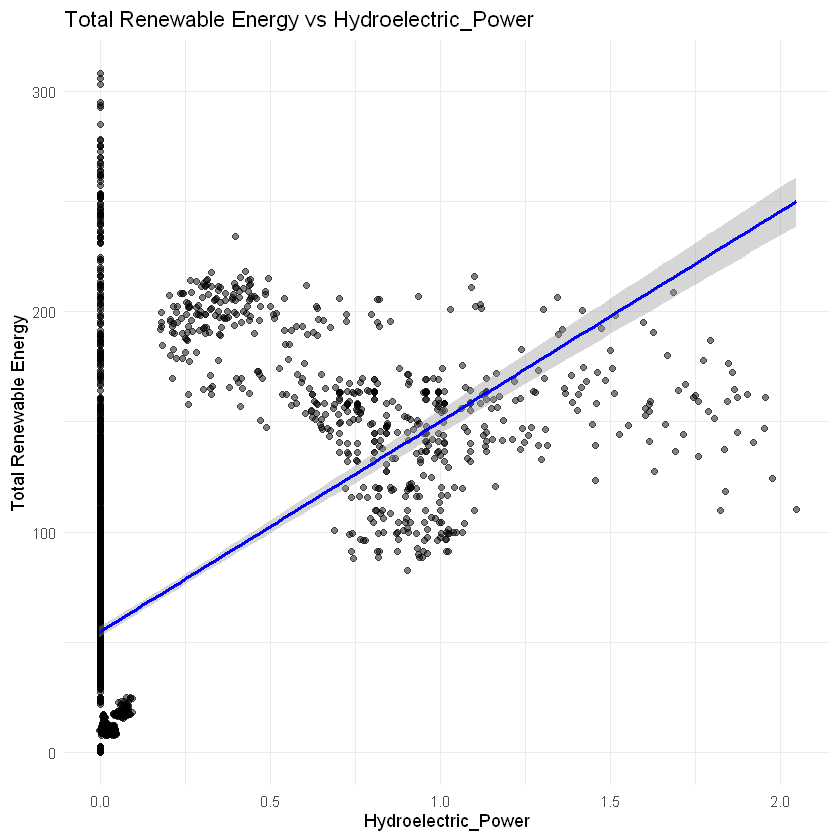

`geom_smooth()` using formula = 'y ~ x'


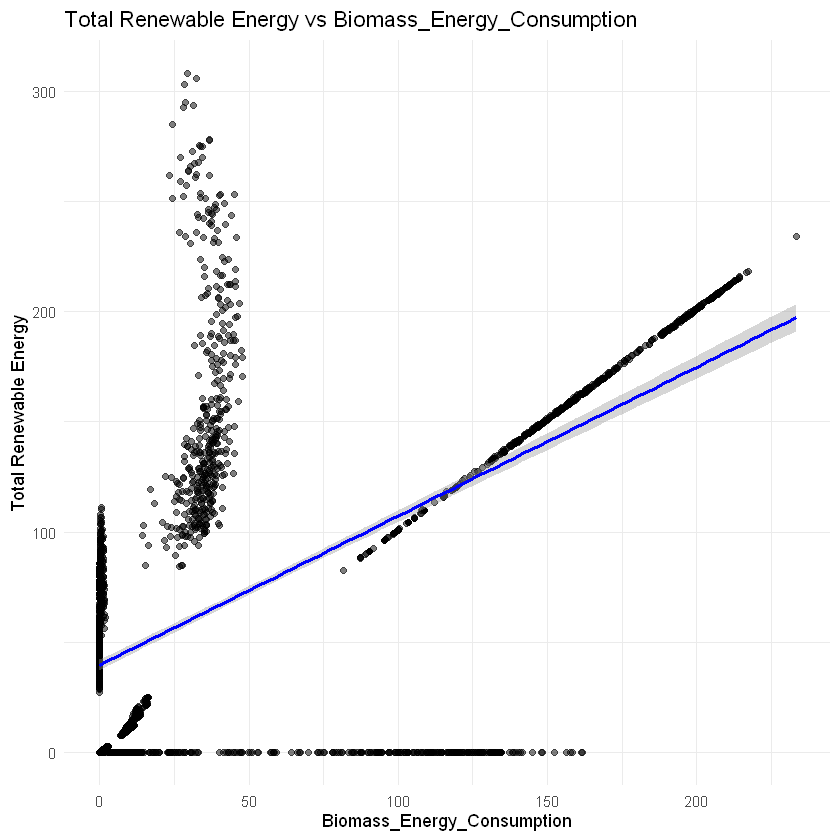

`geom_smooth()` using formula = 'y ~ x'


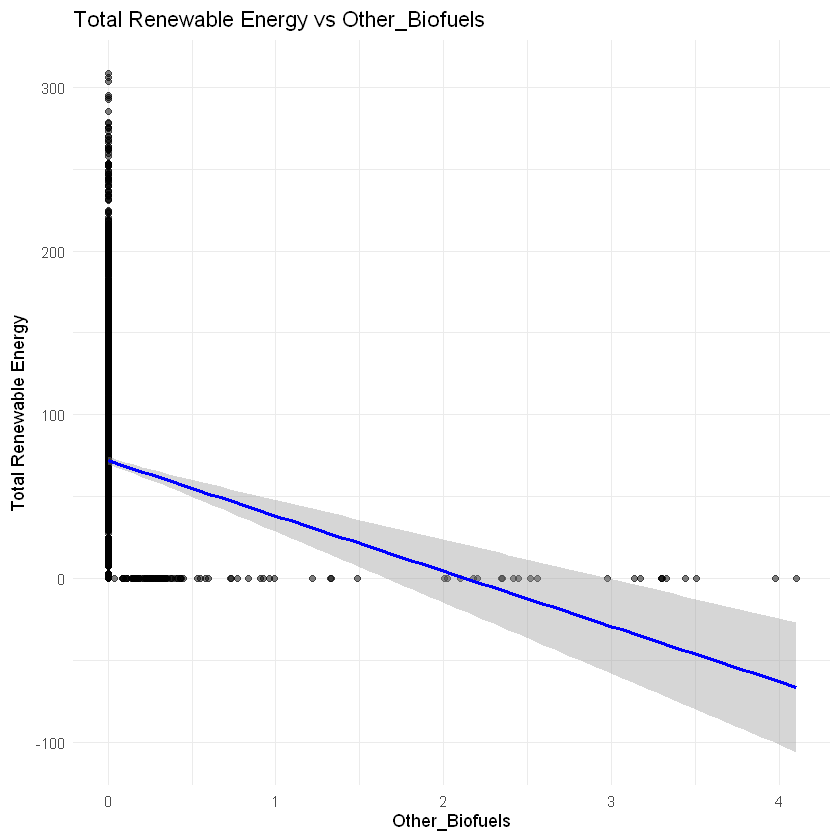

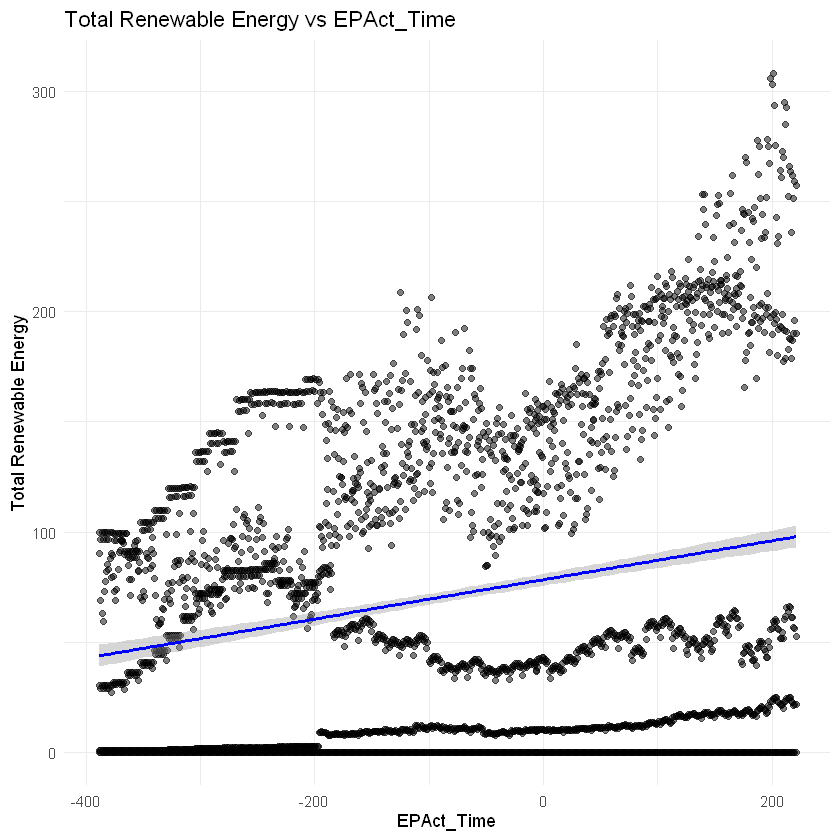

In [10]:
## Scatter Plots for each independent variable vs Total Renewable Energy
independent_vars <- c("Solar_Energy", "Wind_Energy", "Geothermal_Energy", 
                      "Hydroelectric_Power", "Biomass_Energy_Consumption", "Other_Biofuels", "EPAct_Time")
for (var in independent_vars) {
  print(ggplot(data, aes_string(x = var, y = "Total_Renewable_Energy")) +
          geom_point(alpha = 0.5) +
          geom_smooth(method = "lm", color = "blue") +
          labs(title = paste("Total Renewable Energy vs", var), y = "Total Renewable Energy", x = var) +
          theme_minimal())
}

### Summary Statistics

In [11]:
# Calculate summary statistics for each numeric column in the dataset
summary_stats <- data %>%
  summarise(
    Total_Renewable_Energy_mean = mean(Total_Renewable_Energy, na.rm = TRUE),
    Total_Renewable_Energy_sd = sd(Total_Renewable_Energy, na.rm = TRUE),
    Solar_Energy_mean = mean(Solar_Energy, na.rm = TRUE),
    Solar_Energy_sd = sd(Solar_Energy, na.rm = TRUE),
    Wind_Energy_mean = mean(Wind_Energy, na.rm = TRUE),
    Wind_Energy_sd = sd(Wind_Energy, na.rm = TRUE),
    Geothermal_Energy_mean = mean(Geothermal_Energy, na.rm = TRUE),
    Geothermal_Energy_sd = sd(Geothermal_Energy, na.rm = TRUE),
    Hydroelectric_Power_mean = mean(Hydroelectric_Power, na.rm = TRUE),
    Hydroelectric_Power_sd = sd(Hydroelectric_Power, na.rm = TRUE),
    Biomass_Energy_Consumption_mean = mean(Biomass_Energy_Consumption, na.rm = TRUE),
    Biomass_Energy_Consumption_sd = sd(Biomass_Energy_Consumption, na.rm = TRUE),
    Other_Biofuels_mean = mean(Other_Biofuels, na.rm = TRUE),
    Other_Biofuels_sd = sd(Other_Biofuels, na.rm = TRUE),
    EPAct_Time_mean = mean(EPAct_Time, na.rm = TRUE),
    EPAct_Time_sd = sd(EPAct_Time, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = everything(), 
               names_to = "Statistic", 
               values_to = "Value")  # Reshape for readability

# Display the summary statistics as a formatted table
kable(summary_stats, caption = "Summary Statistics for Key Variables", digits = 2)




Table: Summary Statistics for Key Variables

|Statistic                       |  Value|
|:-------------------------------|------:|
|Total_Renewable_Energy_mean     |  70.87|
|Total_Renewable_Energy_sd       |  71.20|
|Solar_Energy_mean               |   2.02|
|Solar_Energy_sd                 |   5.77|
|Wind_Energy_mean                |   4.28|
|Wind_Energy_sd                  |  18.12|
|Geothermal_Energy_mean          |   1.15|
|Geothermal_Energy_sd            |   1.55|
|Hydroelectric_Power_mean        |   0.17|
|Hydroelectric_Power_sd          |   0.37|
|Biomass_Energy_Consumption_mean |  46.29|
|Biomass_Energy_Consumption_sd   |  64.24|
|Other_Biofuels_mean             |   0.03|
|Other_Biofuels_sd               |   0.26|
|EPAct_Time_mean                 | -83.12|
|EPAct_Time_sd                   | 175.77|

***
## Model Building
**Dates:** November 8 - November 14

**Meeting Date:** November 14

### Model Equation

**Equation:** 
I am starting with two equations as follows (one uses ```After_EPAct```, one uses ```EPAct_Time```): 
$$Y = \beta_0 +  \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6 + \beta_7X_7 + \epsilon
\newline
Y = \beta_0 +  \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6 + \beta_8X_8 + \epsilon

### Model Fitting

In [19]:
# Model with After_EPAct
base_model_after <- lm(Total_Renewable_Energy ~ Solar_Energy + Wind_Energy + Geothermal_Energy + 
                       Hydroelectric_Power + Biomass_Energy_Consumption + Other_Biofuels + 
                       After_EPAct, data = data)

# Model with EPAct_Time
base_model_time <- lm(Total_Renewable_Energy ~ Solar_Energy + Wind_Energy + Geothermal_Energy + 
                      Hydroelectric_Power + Biomass_Energy_Consumption + Other_Biofuels + 
                      EPAct_Time, data = data)

# Summaries to assess initial fit
summary(base_model_after)
summary(base_model_time)



Call:
lm(formula = Total_Renewable_Energy ~ Solar_Energy + Wind_Energy + 
    Geothermal_Energy + Hydroelectric_Power + Biomass_Energy_Consumption + 
    Other_Biofuels + After_EPAct, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-84.160 -15.438  -6.326  18.574  74.512 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 11.50011    0.82437  13.950  < 2e-16 ***
Solar_Energy                 1.16132    0.14212   8.172 4.41e-16 ***
Wind_Energy                  1.13642    0.04497  25.268  < 2e-16 ***
Geothermal_Energy           21.79924    0.42113  51.763  < 2e-16 ***
Hydroelectric_Power          9.75080    2.36716   4.119 3.90e-05 ***
Biomass_Energy_Consumption   0.88852    0.01495  59.433  < 2e-16 ***
Other_Biofuels             -43.70717    2.10377 -20.776  < 2e-16 ***
After_EPAct                -39.26008    1.46009 -26.889  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Resi


Call:
lm(formula = Total_Renewable_Energy ~ Solar_Energy + Wind_Energy + 
    Geothermal_Energy + Hydroelectric_Power + Biomass_Energy_Consumption + 
    Other_Biofuels + EPAct_Time, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.441 -14.775  -3.359  16.965  73.777 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -20.17943    1.14166 -17.675  < 2e-16 ***
Solar_Energy                 1.97097    0.14057  14.021  < 2e-16 ***
Wind_Energy                  0.94309    0.04339  21.737  < 2e-16 ***
Geothermal_Energy           24.19133    0.41665  58.061  < 2e-16 ***
Hydroelectric_Power          7.34168    2.19459   3.345 0.000832 ***
Biomass_Energy_Consumption   0.94621    0.01436  65.876  < 2e-16 ***
Other_Biofuels             -38.25633    2.00366 -19.093  < 2e-16 ***
EPAct_Time                  -0.13813    0.00406 -34.022  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Resid

> Note: based on this inital run, ```EPACt_Time``` performs better (which makes sense since it's the more informative one). Both will still be asssesd in this section but untimately only one will be used in the final model. 

### Multicollinearity

In [23]:
# VIF for the model with After_EPAct
vif_base_after <- vif(base_model_after)
print("VIF - Base Model with After_EPAct:")
print(vif_base_after)

# VIF for the model with EPAct_Time
vif_base_time <- vif(base_model_time)
print("VIF - Base Model with EPAct_Time:")
print(vif_base_time)

[1] "VIF - Base Model with After_EPAct:"


              Solar_Energy                Wind_Energy 
                  2.557502                   2.523276 
         Geothermal_Energy        Hydroelectric_Power 
                  1.619858                   2.973546 
Biomass_Energy_Consumption             Other_Biofuels 
                  3.502800                   1.120034 
               After_EPAct 
                  1.870708 
[1] "VIF - Base Model with EPAct_Time:"
              Solar_Energy                Wind_Energy 
                  2.789810                   2.618150 
         Geothermal_Energy        Hydroelectric_Power 
                  1.767815                   2.849568 
Biomass_Energy_Consumption             Other_Biofuels 
                  3.605039                   1.132754 
                EPAct_Time 
                  2.156213 


>**Explanation of Multicollinearity:**
A VIF value > 5 generally indicates possible multicollinearity issues. As all values are below this, there are no intial signs of collinearity in either model and both models have comperable collinearity. 

### Interaction Terms


In [24]:
# Interaction Model with After_EPAct
interaction_model_after <- lm(Total_Renewable_Energy ~ Solar_Energy * After_EPAct + 
                              Wind_Energy * After_EPAct + Geothermal_Energy * After_EPAct + 
                              Hydroelectric_Power * After_EPAct + Biomass_Energy_Consumption * After_EPAct + 
                              Other_Biofuels * After_EPAct, data = data)

# Interaction Model with EPAct_Time
interaction_model_time <- lm(Total_Renewable_Energy ~ Solar_Energy * EPAct_Time + 
                             Wind_Energy * EPAct_Time + Geothermal_Energy * EPAct_Time + 
                             Hydroelectric_Power * EPAct_Time + Biomass_Energy_Consumption * EPAct_Time + 
                             Other_Biofuels * EPAct_Time, data = data)


In [25]:
# VIF for interaction model with After_EPAct
vif_interaction_after <- vif(interaction_model_after, type = "predictor")
print("VIF - Interaction Model with After_EPAct:")
print(vif_interaction_after)

# VIF for interaction model with EPAct_Time
vif_interaction_time <- vif(interaction_model_time, type = "predictor")
print("VIF - Interaction Model with EPAct_Time:")
print(vif_interaction_time)

GVIFs computed for predictors



[1] "VIF - Interaction Model with After_EPAct:"
                                 GVIF Df GVIF^(1/(2*Df))
Solar_Energy                 0.000000  3        0.000000
After_EPAct                  1.000000 13        1.000000
Wind_Energy                  0.000000  3        0.000000
Geothermal_Energy            0.000000  3        0.000000
Hydroelectric_Power        128.231801  3        2.245601
Biomass_Energy_Consumption   0.000000  3        0.000000
Other_Biofuels               8.015431  3        1.414668
                                                                                                                          Interacts With
Solar_Energy                                                                                                                 After_EPAct
After_EPAct                Solar_Energy, Wind_Energy, Geothermal_Energy, Hydroelectric_Power, Biomass_Energy_Consumption, Other_Biofuels
Wind_Energy                                                                          

GVIFs computed for predictors



[1] "VIF - Interaction Model with EPAct_Time:"
                                GVIF Df GVIF^(1/(2*Df))
Solar_Energy               28.288864  3        1.745565
EPAct_Time                  1.000000 13        1.000000
Wind_Energy                30.031943  3        1.763047
Geothermal_Energy          14.981673  3        1.570098
Hydroelectric_Power        72.196026  3        2.040573
Biomass_Energy_Consumption 67.303301  3        2.016846
Other_Biofuels              6.636639  3        1.370855
                                                                                                                          Interacts With
Solar_Energy                                                                                                                  EPAct_Time
EPAct_Time                 Solar_Energy, Wind_Energy, Geothermal_Energy, Hydroelectric_Power, Biomass_Energy_Consumption, Other_Biofuels
Wind_Energy                                                                                   

>**Explanation of Interaction Terms:**
The VIF analysis for both the ```After_EPAct``` and ```EPAct_Time``` models shows generally low multicollinearity among predictors, with some moderate inflation in ```Biomass_Energy_Consumption``` and ```Hydroelectric_Power```. In the interaction models, GVIF values increase, especially for ```Hydroelectric_Power```, indicating potential multicollinearity with added interaction terms. Notably, both ```After_EPAct``` and ```EPAct_Time``` significantly interact with renewable energy sources, suggesting these terms likely capture EPAct-related shifts in consumption patterns. Despite some elevated GVIFs, the interaction models still provide insight into the distinct influences of EPAct and renewable sources over time.

### Model Peformance with AIC and BIC

In [26]:
# AIC and BIC for Base Models
aic_base_after <- AIC(base_model_after)
bic_base_after <- BIC(base_model_after)
aic_base_time <- AIC(base_model_time)
bic_base_time <- BIC(base_model_time)

# AIC and BIC for Interaction Models
aic_interaction_after <- AIC(interaction_model_after)
bic_interaction_after <- BIC(interaction_model_after)
aic_interaction_time <- AIC(interaction_model_time)
bic_interaction_time <- BIC(interaction_model_time)

# Print results
cat("AIC - Base Model with After_EPAct:", aic_base_after, "\n")
cat("BIC - Base Model with After_EPAct:", bic_base_after, "\n")
cat("AIC - Base Model with EPAct_Time:", aic_base_time, "\n")
cat("BIC - Base Model with EPAct_Time:", bic_base_time, "\n\n")

cat("AIC - Interaction Model with After_EPAct:", aic_interaction_after, "\n")
cat("BIC - Interaction Model with After_EPAct:", bic_interaction_after, "\n")
cat("AIC - Interaction Model with EPAct_Time:", aic_interaction_time, "\n")
cat("BIC - Interaction Model with EPAct_Time:", bic_interaction_time, "\n")


AIC - Base Model with After_EPAct: 29222.55 
BIC - Base Model with After_EPAct: 29276.8 
AIC - Base Model with EPAct_Time: 28889.06 
BIC - Base Model with EPAct_Time: 28943.31 

AIC - Interaction Model with After_EPAct: 28312.76 
BIC - Interaction Model with After_EPAct: 28397.15 
AIC - Interaction Model with EPAct_Time: 27618.78 
BIC - Interaction Model with EPAct_Time: 27709.2 


>**Explanation of Model Performance:** 
The AIC and BIC results indicate that the ```EPAct_Time``` models (both base and interaction) are better fits for the data compared to the ```After_EPAct``` models, as they have lower AIC and BIC values. The interaction model with ```EPAct_Time``` has the lowest AIC (27618.78) and BIC (27709.2) among all models, suggesting that including interaction terms along with a time-based EPAct variable significantly improves model performance. This implies that ```EPAct_Time``` as a continuous variable, combined with interaction terms, better captures changes in renewable energy consumption post-EPAct.

### Model Summary and Diagonostics

In [32]:
# Model summary
summary(interaction_model_time)


Call:
lm(formula = Total_Renewable_Energy ~ Solar_Energy * EPAct_Time + 
    Wind_Energy * EPAct_Time + Geothermal_Energy * EPAct_Time + 
    Hydroelectric_Power * EPAct_Time + Biomass_Energy_Consumption * 
    EPAct_Time + Other_Biofuels * EPAct_Time, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.690 -11.274   0.490   9.614  72.579 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                           -2.867e+01  1.183e+00 -24.248  < 2e-16
Solar_Energy                           5.807e+00  2.249e-01  25.823  < 2e-16
EPAct_Time                            -1.797e-01  4.901e-03 -36.671  < 2e-16
Wind_Energy                            1.323e+00  1.451e-01   9.118  < 2e-16
Geothermal_Energy                      2.471e+01  5.191e-01  47.592  < 2e-16
Hydroelectric_Power                    3.377e+01  2.396e+00  14.091  < 2e-16
Biomass_Energy_Consumption             9.606e-01  1.386e-02  69.303  < 2e-16
Other_Bi

In [ ]:
# ANOVA table
anova(interaction_model_time)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Solar_Energy,1,1620462.432,1620462.4319,3395.773788,0.000000e+00
EPAct_Time,1,141980.051,141980.0508,297.527499,1.086199e-63
Wind_Energy,1,2160265.203,2160265.2029,4526.962062,0.000000e+00
Geothermal_Energy,1,378464.826,378464.8262,793.095175,2.600231e-155
Hydroelectric_Power,1,5835331.386,5835331.3861,12228.278161,0.000000e+00
Biomass_Energy_Consumption,1,2919217.721,2919217.7205,6117.391445,0.000000e+00
Other_Biofuels,1,263814.863,263814.8628,552.839472,1.725431e-112
Solar_Energy:EPAct_Time,1,184021.530,184021.5303,385.627878,6.025495e-81
EPAct_Time:Wind_Energy,1,2349.656,2349.6556,4.923841,2.656188e-02


`geom_smooth()` using formula = 'y ~ x'


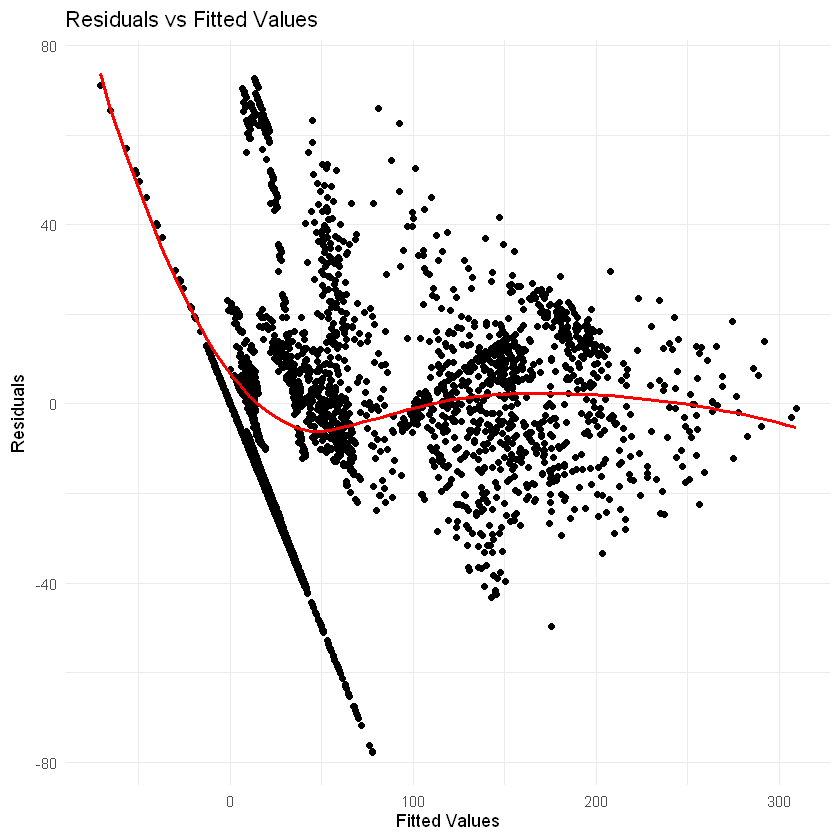

In [35]:
# Residuals vs Fitted plot (to check for homoscedasticity)
ggplot(data.frame(Fitted = fitted(interaction_model_time), Residuals = residuals(interaction_model_time)), aes(x = Fitted, y = Residuals)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, color = "red") +
  labs(x = "Fitted Values", y = "Residuals", title = "Residuals vs Fitted Values") +
  theme_minimal()

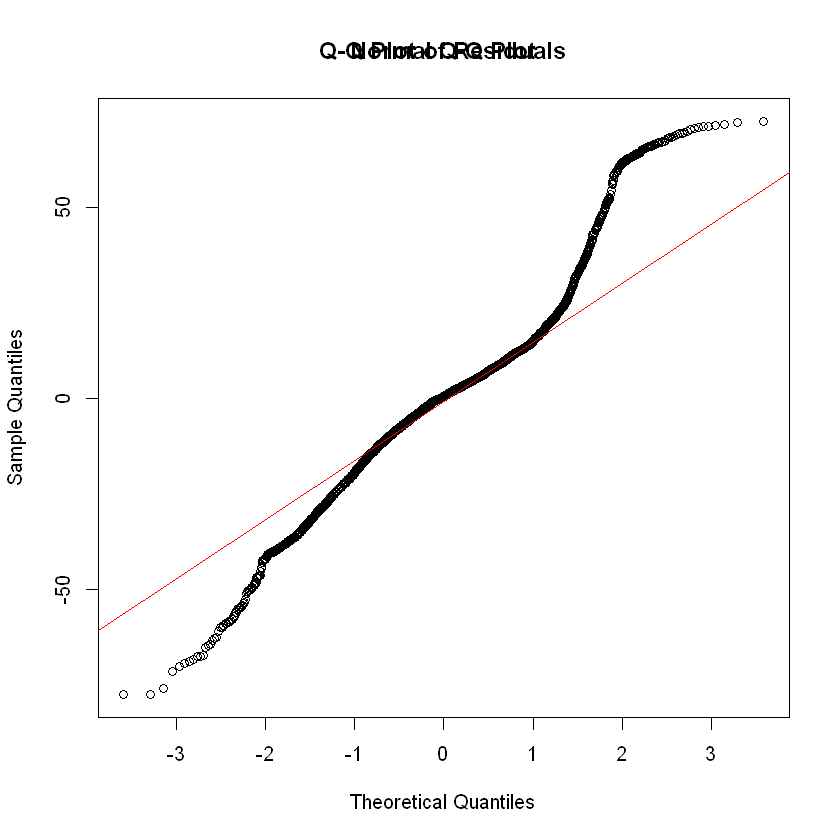

In [36]:
# Q-Q Plot (to check for normality of residuals)
qqnorm(residuals(interaction_model_time))
qqline(residuals(interaction_model_time), col = "red")
title("Q-Q Plot of Residuals")

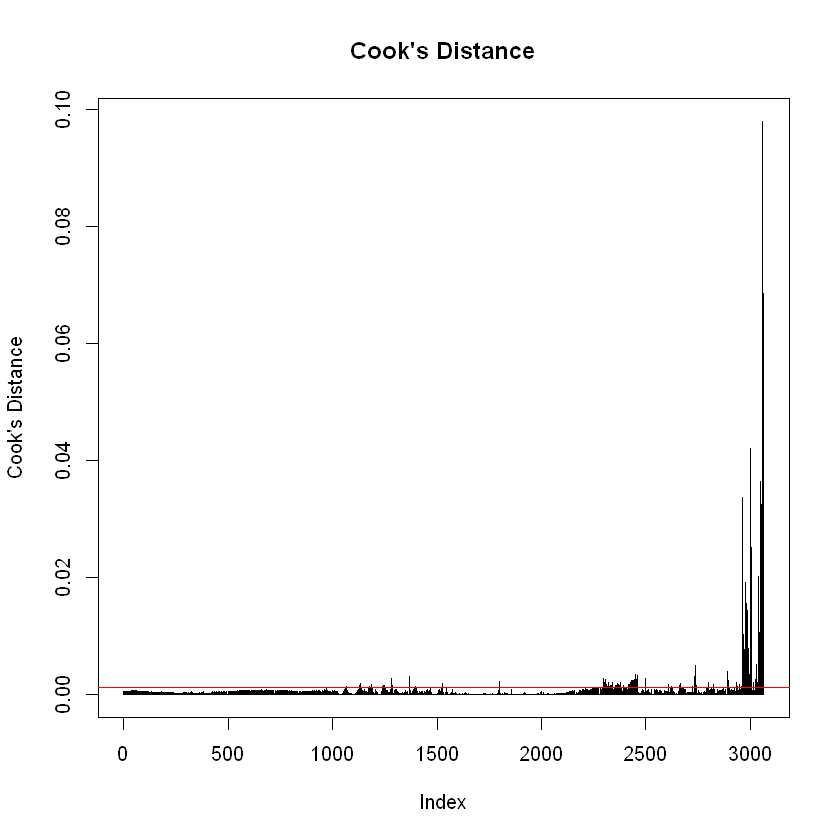

In [37]:
# Cook's Distance plot (influential points)
cooksd <- cooks.distance(interaction_model_time)
plot(cooksd, type = "h", main = "Cook's Distance", ylab = "Cook's Distance")
abline(h = 4 / length(cooksd), col = "red")  # threshold for influential points

### Feature Selection Plan
Describe strategies for reducing the model (if necessary) and rationale.

***
## Model Evaluation & Validation
**Dates:** November 15 - November 21

**Meeting Date:** November 21

### Documentation of Model Adjustments

In [ ]:
# Model adjustments made based on your feature selection plan
# You can add as many code/markdown blocks as you need to show 
# the iterative thought process here as you go. 

Summary of iterative process:
1. First I did this
2. Then I did this because...
3. Then I did this because...

Final Model Equation: 

### Model Evaluation
#### Significance Tests

In [ ]:
# Add your significance test code with outputs here

#### Model Performance Metrics

In [ ]:
# Add your model performance code with outputs here

### Validation Findings

In [ ]:
# Add any validation code here

### Summary of Findings

[Summarize your findings from the model evaluation and validation here. Don't forget to bring it back to your hypothesis and include your final model!]

***
Team Reminder: After this meeting, agree on a report/presentation format and make all of the needed documentation.

***
## Report and Presentation
**Dates:** November 22 - December 1

**Meeting Date:** November 28

No code neccesary here (yay)! Use the space below to brainstorm which graphs you want to include in the report and how you want to tell the story of your model!